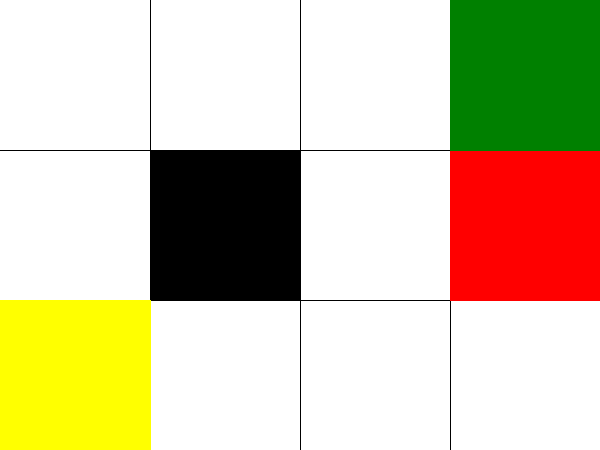

In [8]:
from grid_world import *
from qlearn import *
from sarsa import *
from run_algo import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parameters we will use to create the Grid World (we can make more complex worlds!!)
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = [(1, 3)]
OBSTACLES = [(1,1)]
START = (2, 0)

# Create the environment
env = GridWorld(BOARD_ROWS, BOARD_COLS, WIN_STATE, LOSE_STATE, OBSTACLES, START)


# Number of 'matches' to simulate
N_EPISODES = 100

# Learning model parameters
ALPHA = 0.05
GAMMA = 0.5

# Exploration
MAX_EPSILON = 0.5
MIN_EPSILON = 0.005

# Instances of the learning models
# See sarsa.py and qlearn.py
qlearn = SARSA(ALPHA, GAMMA, env.action_space, MAX_EPSILON, MIN_EPSILON)
sarsa = SARSA(ALPHA, GAMMA, env.action_space, MAX_EPSILON, MIN_EPSILON)

# Let's take a look at the Grid Wold
env.render()

In [9]:
# Instance of the utility class I wrote to run the algorithms
runner = Runner(env, qlearn)
qlearn_steps_taken, qlearn_success = runner.run(N_EPISODES)

runner = Runner(env, sarsa)
sarsa_steps_taken, sarsa_success = runner.run(N_EPISODES)

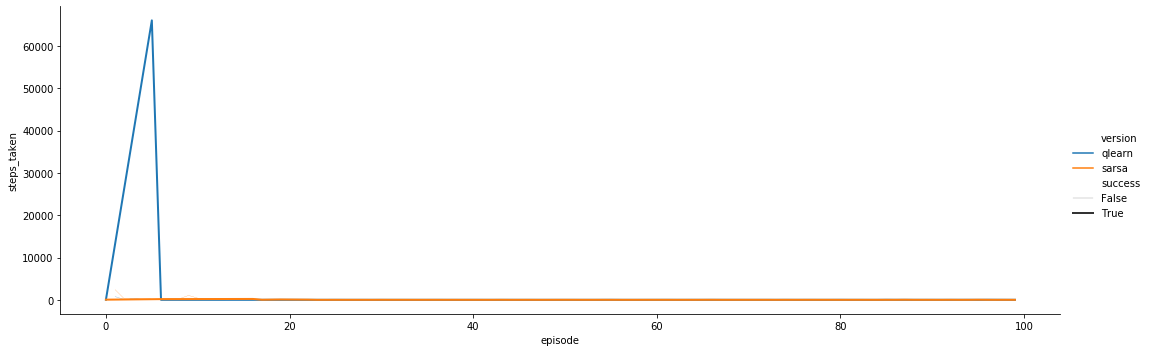

In [10]:
dict = {    'episode': list(range(N_EPISODES))*2,
            'version': ['qlearn']*N_EPISODES + ['sarsa']*N_EPISODES,
            'steps_taken': qlearn_steps_taken + sarsa_steps_taken, 
            'success': qlearn_success + sarsa_success
            }
data = pd.DataFrame(dict)


plot = sns.relplot(x='episode', data=data, y='steps_taken', hue='version', kind="line", size='success', sizes=[0.2,2], aspect=3)
plt.show()

### Now let's try a more complex environment

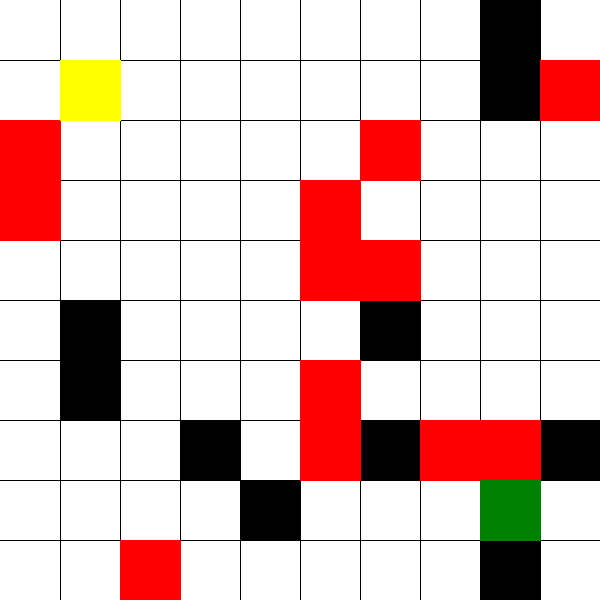

In [11]:
BOARD_ROWS = 10 # Bigger map (roughly 10 times bigger)
BOARD_COLS = 10
START = (1, 1) # We start in the upper left corner of the board
WIN_STATE = (BOARD_ROWS - 2, BOARD_COLS - 2) # And our goal is to go across the board
# Two lose states next to the win state
LOSE_STATE = [(WIN_STATE[0] - 1, WIN_STATE[1] - 1), (WIN_STATE[0] - 1, WIN_STATE[1])] 
# Make more lose states (and leave two of them next to the winning state)
for i in range(10):
    x = 1
    y = 1
    while (x,y) == START or \
          (x,y) == WIN_STATE or\
          (x,y) in LOSE_STATE:
          x = random.randint(0,BOARD_ROWS - 1)
          y = random.randint(0,BOARD_COLS - 1)
    LOSE_STATE.append((x,y))
# Let's make some random obstacles
OBSTACLES = [(10,10), (13,12), (50,50)]   # Make more obstacles
for i in range(10):
    x = 1
    y = 1
    while (x,y) == START or \
          (x,y) == WIN_STATE or \
          (x,y) in LOSE_STATE or \
          (x,y) in OBSTACLES:
          x = random.randint(0,BOARD_ROWS - 1)
          y = random.randint(0,BOARD_COLS - 1)
    OBSTACLES.append((x,y))

# Create the environment
env = GridWorld(BOARD_ROWS, BOARD_COLS, WIN_STATE, LOSE_STATE, OBSTACLES, START)

# Let's take a look at the Grid Wold
env.render()

In [12]:
# We gonna need more iterations to converge in a more complex environment
N_EPISODES = 5000

# We can reuse the learning models (we'll use the same parameters, and the q-tables are reset)
runner = Runner(env, qlearn)
qlearn_steps_taken, qlearn_success = runner.run(N_EPISODES)

runner = Runner(env, sarsa)
sarsa_steps_taken, sarsa_success = runner.run(N_EPISODES)

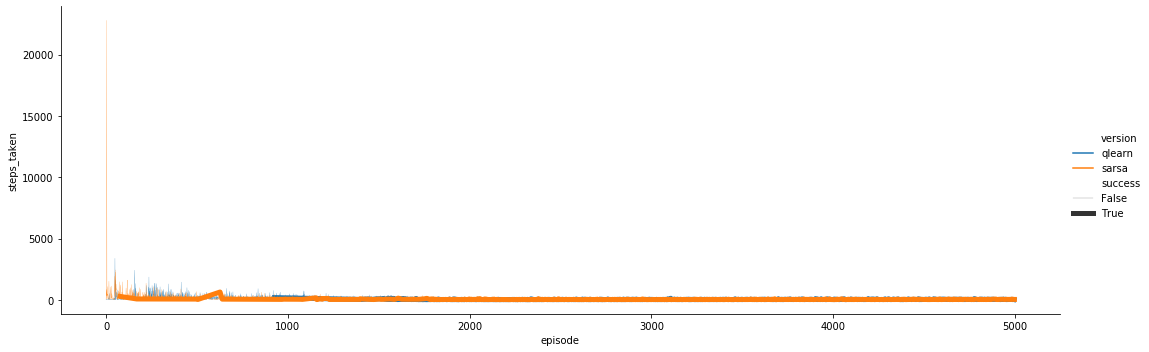

In [13]:
dict = {    'episode': list(range(N_EPISODES))*2,
            'version': ['qlearn']*N_EPISODES + ['sarsa']*N_EPISODES,
            'steps_taken': qlearn_steps_taken + sarsa_steps_taken, 
            'success': qlearn_success + sarsa_success
            }
data = pd.DataFrame(dict)


plot = sns.relplot(x='episode', data=data, y='steps_taken', hue='version', kind="line", size='success', sizes=[0.2,5], aspect=3)
plt.show()